In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train0, y_train0), (x_test0, y_test0) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train0.shape

(50000, 32, 32, 3)

In [4]:
# Preprocess the data
x_train = x_train0.astype('float32') / 255.0
x_test = x_test0.astype('float32') / 255.0


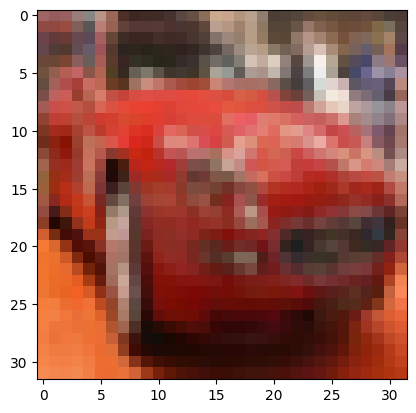

In [5]:
img = Image.fromarray(x_train0[5], "RGB")
plt.imshow(img)

In [6]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train0, num_classes)
y_test = keras.utils.to_categorical(y_test0, num_classes)

### Here, num_classes is set to 10 since CIFAR-10 has 10 classes. The to_categorical function from Keras is used to convert the class labels into binary class matrices. It creates one-hot encoded vectors for each label, representing the class labels in a categorical format.

In [9]:
# Create a sequential model
model = Sequential()

# Flatten the input data
model.add(Flatten(input_shape=x_train.shape[1:]))

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# Train the model
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 27s 66ms/step - loss: 1.8912 - accuracy: 0.3183 - val_loss: 1.7168 - val_accuracy: 0.3865
Epoch 2/10
391/391 [==============================] - 17s 44ms/step - loss: 1.6930 - accuracy: 0.3931 - val_loss: 1.6385 - val_accuracy: 0.4151
Epoch 3/10
391/391 [==============================] - 17s 43ms/step - loss: 1.5951 - accuracy: 0.4293 - val_loss: 1.5383 - val_accuracy: 0.4527
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 1.5357 - accuracy: 0.4516 - val_loss: 1.4979 - val_accuracy: 0.4658
Epoch 5/10
391/391 [==============================] - 14s 37ms/step - loss: 1.4891 - accuracy: 0.4655 - val_loss: 1.5153 - val_accuracy: 0.4695
Epoch 6/10
391/391 [==============================] - 15s 37ms/step - loss: 1.4547 - accuracy: 0.4804 - val_loss: 1.4782 - val_accuracy: 0.4802
Epoch 7/10
391/391 [==============================] - 16s 40ms/step - loss: 1.4256 - accuracy: 0.4936 - val_loss: 1.4690 - val_accuracy:

In [11]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.4749 - accuracy: 0.4770
Test loss: 1.474932074546814
Test accuracy: 0.47699999809265137


In [12]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [13]:
predictions

array([[1.41149955e-02, 8.45743995e-03, 4.69881631e-02, ...,
        2.84973206e-03, 1.54705513e-02, 1.92707067e-03],
       [2.84457952e-02, 1.69860218e-02, 1.90019689e-03, ...,
        1.00940687e-03, 8.16823959e-01, 1.32398531e-01],
       [2.68532604e-01, 1.24030448e-02, 2.05786116e-02, ...,
        3.47991171e-03, 6.81323290e-01, 9.85977333e-03],
       ...,
       [3.15163052e-03, 2.34337524e-04, 1.86788887e-01, ...,
        3.40644009e-02, 1.19059430e-02, 4.48259665e-03],
       [3.72443744e-03, 6.48341794e-03, 1.60635859e-01, ...,
        5.03712818e-02, 6.03150064e-03, 1.45464176e-02],
       [3.45049836e-02, 2.64035305e-03, 8.93894359e-02, ...,
        6.56148016e-01, 8.68820585e-03, 8.20640381e-03]], dtype=float32)

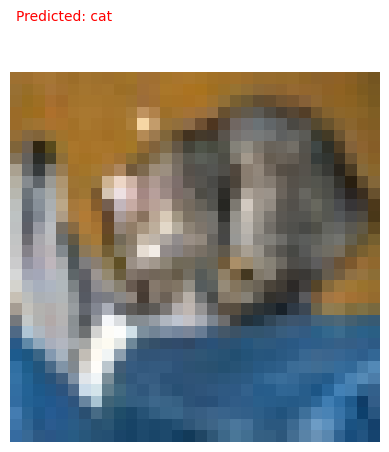

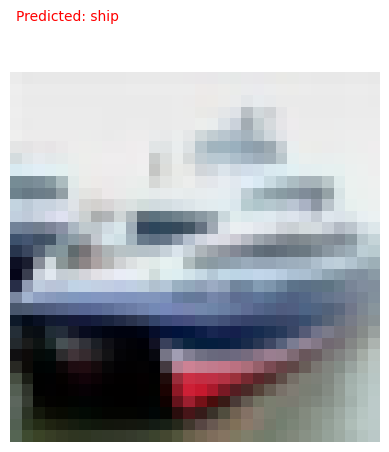

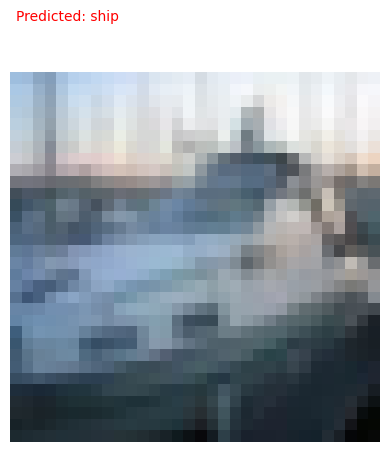

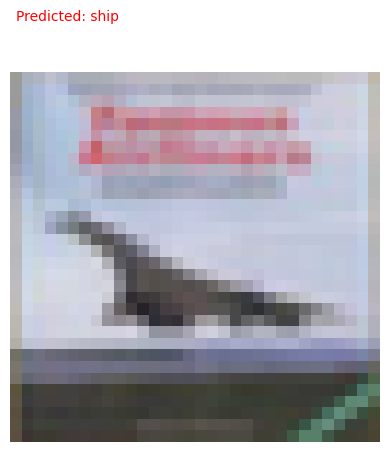

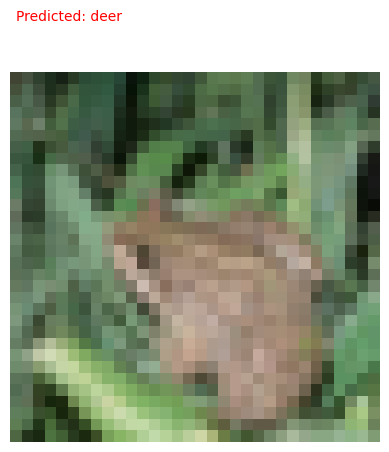

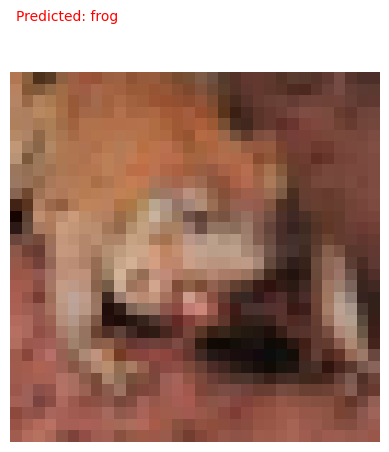

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for i in range(6):
    img = Image.fromarray(x_test0[i], "RGB")
    plt.imshow(img)
    predicted_label = np.argmax(predictions[i])
    #print(classes[predicted_label])
    plt.text(0, -5, f"Predicted: {classes[predicted_label]}", color='red')  # Add predicted label as text
    plt.axis('off')  # Remove axis ticks
    plt.show()